<img src="images/usm.jpg" width="480" height="240" align="left"/>

# MAT281 - Laboratorio N°05

## Objetivos de la clase

* Reforzar los conceptos básicos de visualización.

## Contenidos

* [Problema 01](#p1)


## Problema 01

<img src="http://nelsoncos.com/wp-content/uploads/2017/02/sales-icon.png" width="360" height="360" align="center"/>


EL conjunto de datos se denomina `company_sales_data.csv`, el cual contiene información tal como: número del mes, unidades, precio, etc.

Lo primero es cargar el conjunto de datos y ver las primeras filas que lo componen:

In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(10,8)})

In [2]:
# cargar datos
df = pd.read_csv(os.path.join("data","company_sales_data.csv"))
df.head()

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
0,1,2500,1500,5200,9200,1200,1500,21100,211000
1,2,2630,1200,5100,6100,2100,1200,18330,183300
2,3,2140,1340,4550,9550,3550,1340,22470,224700
3,4,3400,1130,5870,8870,1870,1130,22270,222700
4,5,3600,1740,4560,7760,1560,1740,20960,209600


El objetivo es tratar de obtener la mayor información posible de este conjunto de datos. Para cumplir este objetivo debe resolver las siguientes problemáticas:

**Observación.-** Puedes ocupar las librerías de Matplolib o Seaborn.

1. Lea el "total_profit" de todos los meses, muéstrelo usando un gráfico lineal y un gráfico de dispersión.

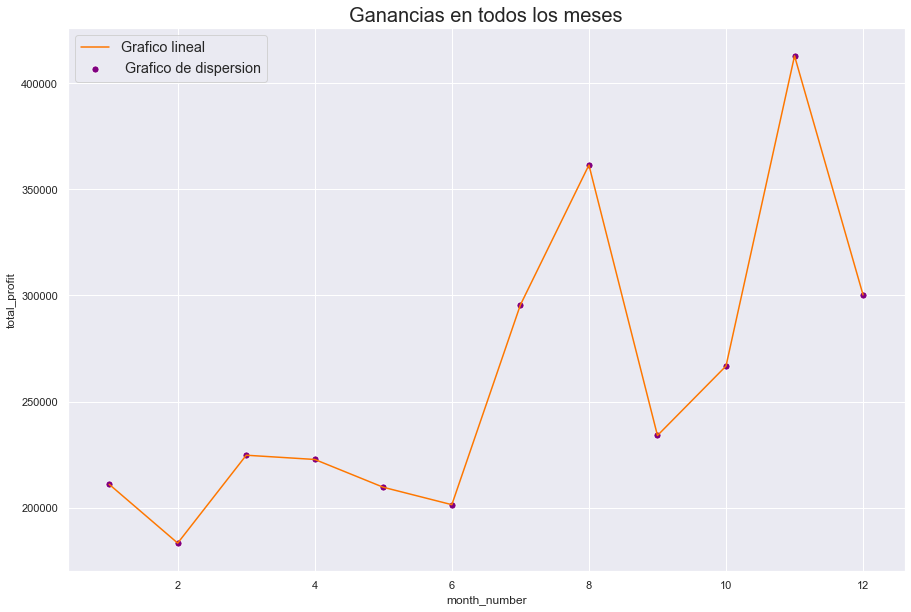

In [42]:
palette = sns.color_palette("hls", 12) # paleta de colores
plt.figure(figsize=(15,10))
# grafica lineal
ax = sns.lineplot(
    x='month_number', # eje X
    y='total_profit', # eje Y
    data=df, # datos
    ci = None,
    label='Grafico lineal', #etiqueta
    color='#FE7700' # colores
) 

#grafica de dispersion
ax = sns.scatterplot(
        x='month_number', # eje X
        y='total_profit', # eje Y
        s=50, # tamaño de los puntos
        data=df, # datos
        color='purple', # color
        #hue='month_number', # color por mes
        label=' Grafico de dispersion' # etiqueta
)
plt.legend(loc='upper left', fontsize='x-large') # leyenda
plt.title('Ganancias en todos los meses', fontsize=20) # titulo
plt.show()

2. Lea todos los datos de ventas de productos y muéstrelos utilizando un gráfico multilínea.

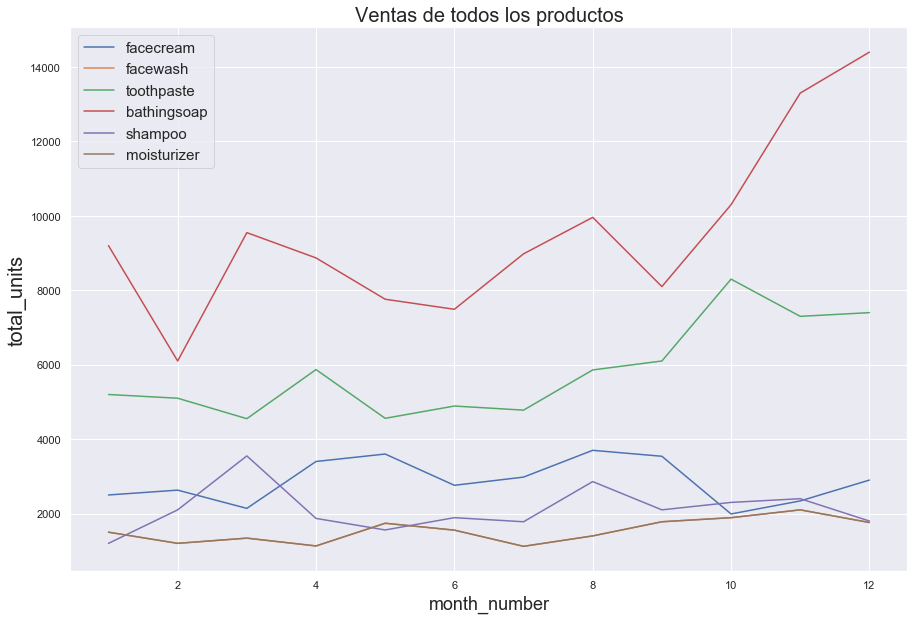

In [39]:
# Pre-format DataFrame
sells_df = df.drop(['month_number', 'total_units', 'total_profit'], axis=1) # agrupacion de los datos
cols = sells_df.columns # columnas
plt.figure(figsize=(15,10))
# Ventas de cada producto
for columna in cols:
    sns.lineplot(
        x='month_number', # eje X
        y=columna, # eje Y
        #hue='total_profit',# color por total_profit
        data=df, # data
        #ci = None,
        label=str(columna), # etiqueta de columna
        palette=palette # color
    )
plt.xlabel('month_number',fontsize=18)
plt.ylabel('total_units', fontsize=20) # etiqueta eje Y
plt.legend(loc='upper left', fontsize=15) # leyenda
plt.title('Ventas de todos los productos', fontsize=20) # titulo
plt.show()
#nótese en el database que facewash y moisturizer tienen los mismos datos, así que por eso se ven 5 graficos en vez de 6

3. Lea los datos de ventas de productos de "facecream" y "facewash" y muéstrelos usando el gráfico de barras.

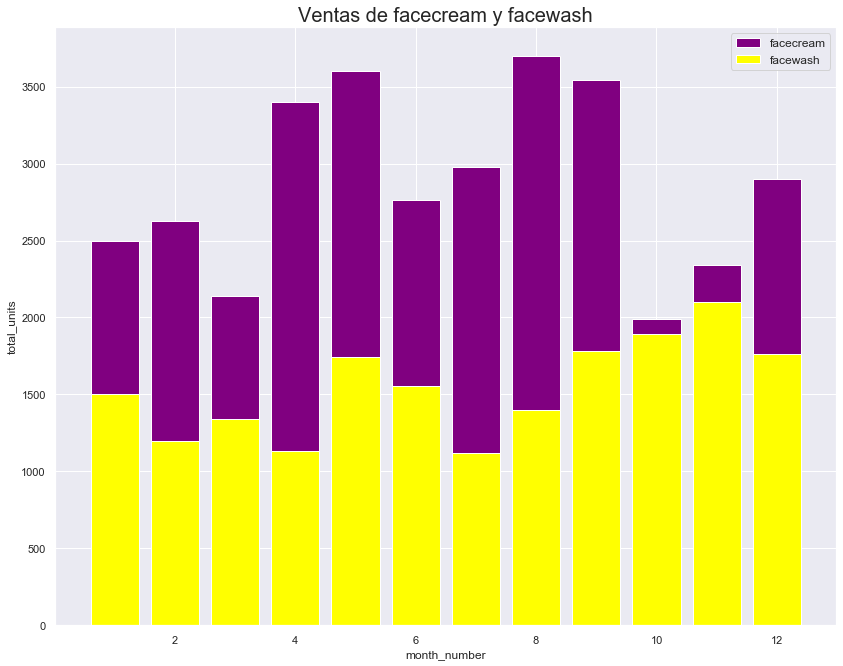

In [20]:
ax = plt.figure(figsize=(14, 11))
ax = plt.bar(
        df['month_number'], # eje x
        df['facecream'], # eje y 
        align='center', # centrar nombre eje x
        color="purple", # color 
        alpha=1, # intensidad del color
        label='facecream' # etiqueta
    )
ax = plt.bar(
        df['month_number'], # eje x
        df['facewash'], # eje y 
        align='center', # centrar nombre eje x
        color="yellow", # color 
        alpha=1, # intensidad del color
        label='facewash' # etiqueta
    )

plt.legend(fontsize='large') # leyenda
plt.xlabel('month_number') # etiqueta eje X
plt.ylabel('total_units') # etiqueta eje Y
plt.title('Ventas de facecream y facewash', fontsize=20) # titulo
plt.show()

4. Lea todos los datos de ventas de productos y muéstrelos utilizando un gráfico box-plot.

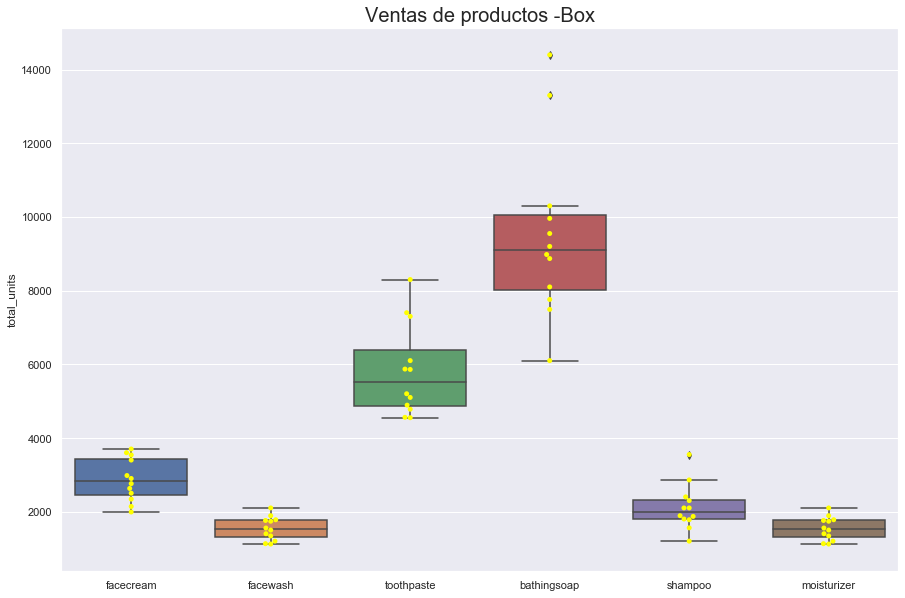

In [31]:
plt.figure(figsize=(15,10)) #ajustar tamaño
sns.boxplot(data=sells_df) # grafico de caja
sns.swarmplot(data=sells_df, color='yellow') # grafico de distribucion de cada producto
plt.ylabel('total_units') # etiqueta eje Y
plt.title('Ventas de productos -Box', fontsize=20) # titulo
plt.show()

5. Calcule los datos de ventas totales del año pasado para cada producto y muéstrelos usando un gráfico circular

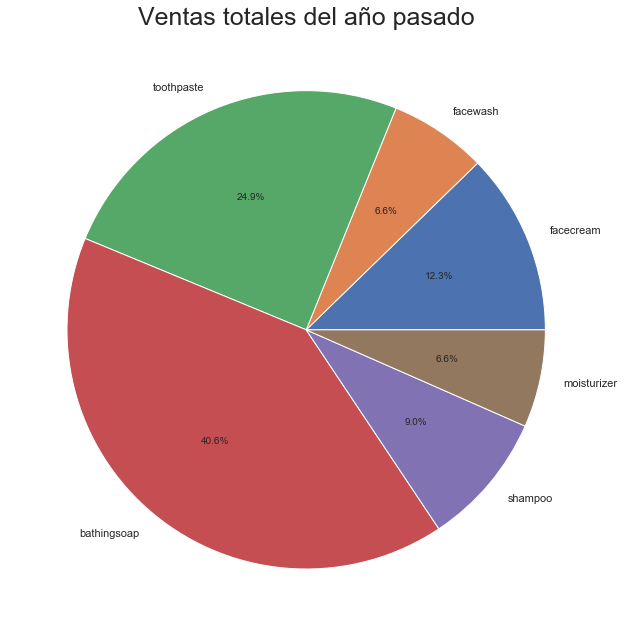

In [27]:
ventas = sells_df.apply(lambda x: sum(x)) # ventas totales del año de cada producto

fig = plt.figure(figsize=(12,11))

# grafica de torta
plt.pie(
        ventas, # datos
        labels=cols, # etiqueta de los datos
        autopct='%1.1f%%' # porcentaje a mostrar
       )

plt.title('Ventas totales del año pasado', fontsize=25) # titulo, tamaño
plt.show()